# Mchezopesa Football Results Analysis

Working as a football analysis for Mchezopesa limited, I have been tasked to perform the following tasks:



*   A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

---

**Approach 1: Polynomial approach**

What to train given:

1.   Rank of home team
2.   Rank of away team
3.   Tournament type


Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

**Approach 2: Logistic approach**

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


# 1. Question Definition.

## a. Specifying the Data Analytic Question

Approach 1: Polynomial approach

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

## b. Metric for Success

The metrics of success of this project are to be able to create a model that predicts how many goals the home and away teams score using polynomial approach, and create a model that figures if a game is a win, lose or draw from the home teams's perspective

## c. Understanding the background of the research

The men's FIFA World Ranking is a ranking system for men's national teams in association football, Belgium currently leads by 1832.33 points.The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.

The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. Since 16 August 2018, the current version of the ranking system has adopted the Elo rating system used in chess and Go. The rankings are also used to determine the winners of the two annual awards national teams receive on the basis of their performance in the rankings.

The (English) Football Association uses the average of the last 24 months of rankings as one of the criteria for player work permits.

## d. Procedure to the Experimental design

The following are the steps taken in this analysis
1. Question Definition
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning and Merging
5. Performing EDA on data
6. Check for Multicollinearity
7. Polynomial Regression
8. Logistic Regression

## e. Data Relevance

Our data was collected from different countries around the world. The reserch uses two datasets.

One contains data on features such as which country was the home team and which was the away team, the scores for each side, tournament type, city and country. The second dataset contains data on the countries' FIFA rankings. We have features such as the country, rank, total points, previous points, rank change ... among other features.


# 2. Reading the Data

In [400]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics

# reading our csv files
ranking = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')

# 3. Data checking


In [401]:
ranking.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [402]:
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [403]:
# Checking the number of records in our dataframes
print("Ranking dataframe:\n",ranking.shape)
print("Results dataframe:\n",results.shape)

Ranking dataframe:
 (57793, 16)
Results dataframe:
 (40839, 9)


The ranking dataframe had 16 columns and 57793 rows while the results dataframe has 9 columns and 40839 rows

In [404]:
#preview of the datasets
print("Rankings dataframe:\n ",ranking)
print("***********************************************************************")
print("Results dataframe:\n ",results)

Rankings dataframe:
         rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]
***********************************************************************
Results dataframe:
               date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2     

### Data Appropriateness

We will check if the data has its appropriate dataypes

In [405]:
#Check for datatype of our columns
#preview of the datasets
print("Rankings dataframe:\n ",ranking.dtypes)
print("***********************************************************************")
print("Results dataframe:\n ",results.dtypes)

Rankings dataframe:
  rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
***********************************************************************
Results dataframe:
  date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


Our datatypes look okay except for the date. This is remedied by using the inbuilt function called datetime which will convert it from an object to a datetime datatype

Converting date to datetime datatype

In [406]:
#importing datetime library
import datetime

ranking.rank_date = pd.to_datetime(ranking.rank_date)
results.date = pd.to_datetime(results.date)

print("Rankings dataframe:\n ",ranking.dtypes)
print("***********************************************************************")
print("Results dataframe:\n ",results.dtypes)

Rankings dataframe:
  rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object
***********************************************************************
Results dataframe:
  date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  obj

In [407]:
# Separate the dates to day, month and year for easier and better analysis
#ranking dataframe
ranking['day'] = ranking['rank_date'].dt.day
ranking['month'] = ranking['rank_date'].dt.month
ranking['year'] = ranking['rank_date'].dt.year

#results dataframe
results['day'] = results['date'].dt.day
results['month'] = results['date'].dt.month
results['year'] = results['date'].dt.year

In [408]:
print("Ranking dataframe:\n",ranking.shape)
print("Results dataframe:\n",results.shape)

Ranking dataframe:
 (57793, 19)
Results dataframe:
 (40839, 12)


## Data Cleaning and Merging

We will merge our two datasets into one and perform data cleaning 

In [409]:
#Changing the column name of "country" in results dataframe to "country_full" to match the one in ranking dataframe
results = results.rename(columns = {'home_team' : 'country_full'})

Merging our dataframes

In [410]:
home_team = results.merge(ranking, how = 'left', right_on = ['country_full','month','year','day'], left_on=['country_full','month','year','day'])
home_team

,date,country_full,away_team,home_score,away_score,tournament,city,country,neutral,day,month,year,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,11,1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,8,3,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,7,3,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,6,3,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,4,3,1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,18,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,18,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,19,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,19,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


Check for null values

In [411]:
home_team.isnull().sum()

date                           0
country_full                   0
away_team                      0
home_score                     0
away_score                     0
tournament                     0
city                           0
country                        0
neutral                        0
day                            0
month                          0
year                           0
rank                       39882
country_abrv               39882
total_points               39882
previous_points            39882
rank_change                39882
cur_year_avg               39882
cur_year_avg_weighted      39882
last_year_avg              39882
last_year_avg_weighted     39882
two_year_ago_avg           39882
two_year_ago_weighted      39882
three_year_ago_avg         39882
three_year_ago_weighted    39882
confederation              39882
rank_date                  39882
dtype: int64

Dropping Null Values

In [412]:
#There are null values in our merged dataframe. These will have to be dropped
home_team = home_team.dropna()
# Check for remaining null values
home_team.isnull().sum()

date                       0
country_full               0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
day                        0
month                      0
year                       0
rank                       0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [413]:
home_team.shape

(957, 27)

Check for duplicated values

In [414]:
home_team.duplicated().sum()

0

In [415]:
# In order to merge the away team, we have to rename the column 'country_full' back to the original title, 'home_team' to be the same as the results

home_team = home_team.rename(columns = {'country_full' : 'home_team'})
results = results.rename(columns = {'country_full' : 'home_team','away_team':'country_full'})

print("Home dataframe")
print(home_team.head(10))

print("\n \n Results dataframe")
print(results.head(10))

Home dataframe
            date     home_team  ... confederation  rank_date
17915 1993-08-08       Bolivia  ...      CONMEBOL 1993-08-08
17916 1993-08-08        Brazil  ...      CONMEBOL 1993-08-08
17917 1993-08-08       Ecuador  ...      CONMEBOL 1993-08-08
17918 1993-08-08        Guinea  ...           CAF 1993-08-08
17919 1993-08-08      Paraguay  ...      CONMEBOL 1993-08-08
17920 1993-08-08          Peru  ...      CONMEBOL 1993-08-08
17921 1993-08-08      Zimbabwe  ...           CAF 1993-08-08
17977 1993-09-23  Saudi Arabia  ...           AFC 1993-09-23
18186 1994-03-15         Gabon  ...           CAF 1994-03-15
18187 1994-03-15        Israel  ...          UEFA 1994-03-15

[10 rows x 27 columns]

 
 Results dataframe
        date home_team country_full  home_score  ...  neutral day month  year
0 1872-11-30  Scotland      England           0  ...    False  30    11  1872
1 1873-03-08   England     Scotland           4  ...    False   8     3  1873
2 1874-03-07  Scotland      Englan

In [416]:
#Merging the rankings and results dataframe by country and date for the away team

away_team = results.merge(ranking, how = 'left', right_on = ['country_full','month','year','day'], left_on=['country_full','month','year','day'])
away_team

,date,home_team,country_full,home_score,away_score,tournament,city,country,neutral,day,month,year,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,11,1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,8,3,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,7,3,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,6,3,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,4,3,1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,18,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,18,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,19,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,19,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [417]:
#Check for presence of null values
away_team.isnull().sum()

date                           0
home_team                      0
country_full                   0
home_score                     0
away_score                     0
tournament                     0
city                           0
country                        0
neutral                        0
day                            0
month                          0
year                           0
rank                       39906
country_abrv               39906
total_points               39906
previous_points            39906
rank_change                39906
cur_year_avg               39906
cur_year_avg_weighted      39906
last_year_avg              39906
last_year_avg_weighted     39906
two_year_ago_avg           39906
two_year_ago_weighted      39906
three_year_ago_avg         39906
three_year_ago_weighted    39906
confederation              39906
rank_date                  39906
dtype: int64

Dropping null values

In [418]:
# #There are null values in our merged dataframe. These will have to be dropped
away_team = away_team.dropna()
away_team.isnull().sum()

date                       0
home_team                  0
country_full               0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
day                        0
month                      0
year                       0
rank                       0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [419]:
#check for duplicate values
print("Number of Duplicates: ",away_team.duplicated().sum())
print("***********************")
away_team = away_team.rename(columns = {'country_full' : 'away_team'})
print(away_team)

Number of Duplicates:  0
***********************
            date    home_team  ... confederation  rank_date
17915 1993-08-08      Bolivia  ...      CONMEBOL 1993-08-08
17916 1993-08-08       Brazil  ...      CONCACAF 1993-08-08
17917 1993-08-08      Ecuador  ...      CONMEBOL 1993-08-08
17918 1993-08-08       Guinea  ...           CAF 1993-08-08
17919 1993-08-08     Paraguay  ...      CONMEBOL 1993-08-08
...          ...          ...  ...           ...        ...
39821 2018-06-07      Uruguay  ...           AFC 2018-06-07
39822 2018-06-07     Portugal  ...           CAF 2018-06-07
39823 2018-06-07  South Korea  ...      CONMEBOL 2018-06-07
39824 2018-06-07      Iceland  ...           CAF 2018-06-07
39826 2018-06-07        India  ...           OFC 2018-06-07

[933 rows x 27 columns]


Merge to a final dataset

In [420]:
#Merge to our final dataframe
df_all = home_team.merge(away_team, how='left', left_on = ['date','home_team','away_team','tournament'],right_on = ['date','home_team','away_team','tournament'])
df_all


,date,home_team,away_team,home_score_x,away_score_x,tournament,city_x,country_x,neutral_x,day_x,month_x,year_x,rank_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,home_score_y,away_score_y,city_y,country_y,neutral_y,day_y,month_y,year_y,rank_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,8,8,1993,59.0,BOL,0.00,13.0,28.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,3.0,1.0,La Paz,Bolivia,False,8.0,8.0,1993.0,22.0,URU,0.00,47.0,-6.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,8,1993,8.0,BRA,0.00,55.0,-5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1.0,1.0,Maceió,Brazil,False,8.0,8.0,1993.0,14.0,MEX,0.00,42.0,11.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,8,8,1993,35.0,ECU,0.00,23.0,30.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,5.0,0.0,Quito,Ecuador,False,8.0,8.0,1993.0,94.0,VEN,0.00,4.0,31.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,8,8,1993,65.0,GUI,0.00,23.0,-2.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08,1.0,0.0,Conakry,Guinea,False,8.0,8.0,1993.0,86.0,SLE,0.00,16.0,-7.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,8,8,1993,67.0,PAR,0.00,22.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08,1.0,3.0,Asunción,Paraguay,False,8.0,8.0,1993.0,5.0,ARG,0.00,51.0,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,2018-06-07,England,Costa Rica,2,0,Friendly,Leeds,England,False,7,6,2018,12.0,ENG,1050.84,1040.0,1.0,476.42,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA,2018-06-07,2.0,0.0,Leeds,England,False,7.0,6.0,2018.0,23.0,CRC,884.04,858.0,2.0,410.90,410.90,480.58,240.29,332.44,99.73,665.55,133.11,CONCACAF,2018-06-07
953,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False,7,6,2018,14.0,URU,1018.41,976.0,3.0,486.28,486.28,487.69,243.84,561.47,168.44,599.26,119.85,CONMEBOL,2018-06-07,3.0,0.0,Montevideo,Uruguay,False,7.0,6.0,2018.0,95.0,UZB,353.91,381.0,-7.0,66.85,66.85,305.61,152.80,311.74,93.52,203.71,40.74,AFC,2018-06-07
954,2018-06-07,Portugal,Algeria,3,0,Friendly,Lisbon,Portugal,False,7,6,2018,4.0,POR,1273.69,1306.0,0.0,646.92,646.92,691.82,345.91,517.77,155.33,627.63,125.53,UEFA,2018-06-07,3.0,0.0,Lisbon,Portugal,False,7.0,6.0,2018.0,66.0,ALG,473.83,499.0,-2.0,163.41,163.41,234.78,117.39,304.68,91.40,508.13,101.63,CAF,2018-06-07
955,2018-06-07,Iceland,Ghana,2,2,Friendly,Reykjavík,Iceland,False,7,6,2018,22.0,ISL,908.01,930.0,0.0,438.64,438.64,564.25,282.13,302.02,90.61,483.19,96.64,UEFA,2018-06-07,2.0,2.0,Reykjavík,Iceland,False,7.0,6.0,2018.0,47.0,GHA,623.69,603.0,3.0,261.21,261.21,339.92,169.96,332.99,99.90,463.15,92.63,CAF,2018-06-07


Check for null values

In [421]:
df_all.isnull().sum()

date                          0
home_team                     0
away_team                     0
home_score_x                  0
away_score_x                  0
tournament                    0
city_x                        0
country_x                     0
neutral_x                     0
day_x                         0
month_x                       0
year_x                        0
rank_x                        0
country_abrv_x                0
total_points_x                0
previous_points_x             0
rank_change_x                 0
cur_year_avg_x                0
cur_year_avg_weighted_x       0
last_year_avg_x               0
last_year_avg_weighted_x      0
two_year_ago_avg_x            0
two_year_ago_weighted_x       0
three_year_ago_avg_x          0
three_year_ago_weighted_x     0
confederation_x               0
rank_date_x                   0
home_score_y                 86
away_score_y                 86
city_y                       86
country_y                    86
neutral_

In [422]:
#Dropping null values from the dataframe
df_all = df_all.dropna()
df_all.isnull().sum()

date                         0
home_team                    0
away_team                    0
home_score_x                 0
away_score_x                 0
tournament                   0
city_x                       0
country_x                    0
neutral_x                    0
day_x                        0
month_x                      0
year_x                       0
rank_x                       0
country_abrv_x               0
total_points_x               0
previous_points_x            0
rank_change_x                0
cur_year_avg_x               0
cur_year_avg_weighted_x      0
last_year_avg_x              0
last_year_avg_weighted_x     0
two_year_ago_avg_x           0
two_year_ago_weighted_x      0
three_year_ago_avg_x         0
three_year_ago_weighted_x    0
confederation_x              0
rank_date_x                  0
home_score_y                 0
away_score_y                 0
city_y                       0
country_y                    0
neutral_y                    0
day_y   

### Data Cleaning



*   Drop irrelevant columns
*   Rename columns
*   Check for outliers and anomalies



In [423]:
#dropping irrelevant columns

#create a list of columns needed
cols = ['home_team','home_score_x','away_team','away_score_x','year_x','rank_x','rank_y','tournament']
df_all = df_all.reindex(columns= cols)
df_all

,home_team,home_score_x,away_team,away_score_x,year_x,rank_x,rank_y,tournament
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification
...,...,...,...,...,...,...,...,...
952,England,2,Costa Rica,0,2018,12.0,23.0,Friendly
953,Uruguay,3,Uzbekistan,0,2018,14.0,95.0,Friendly
954,Portugal,3,Algeria,0,2018,4.0,66.0,Friendly
955,Iceland,2,Ghana,2,2018,22.0,47.0,Friendly


In [424]:
#Rename our columns
df_all = df_all.rename(columns={'home_score_x' : 'home_team_score','away_score_x' : 'away_team_score','year_x' : 'year','rank_x' : 'home_team_rank','rank_y' : 'away_team_rank'})
#check column names
df_all.head(0)

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament


In [425]:
df_all.shape

(871, 8)

Outliers and Anomalies

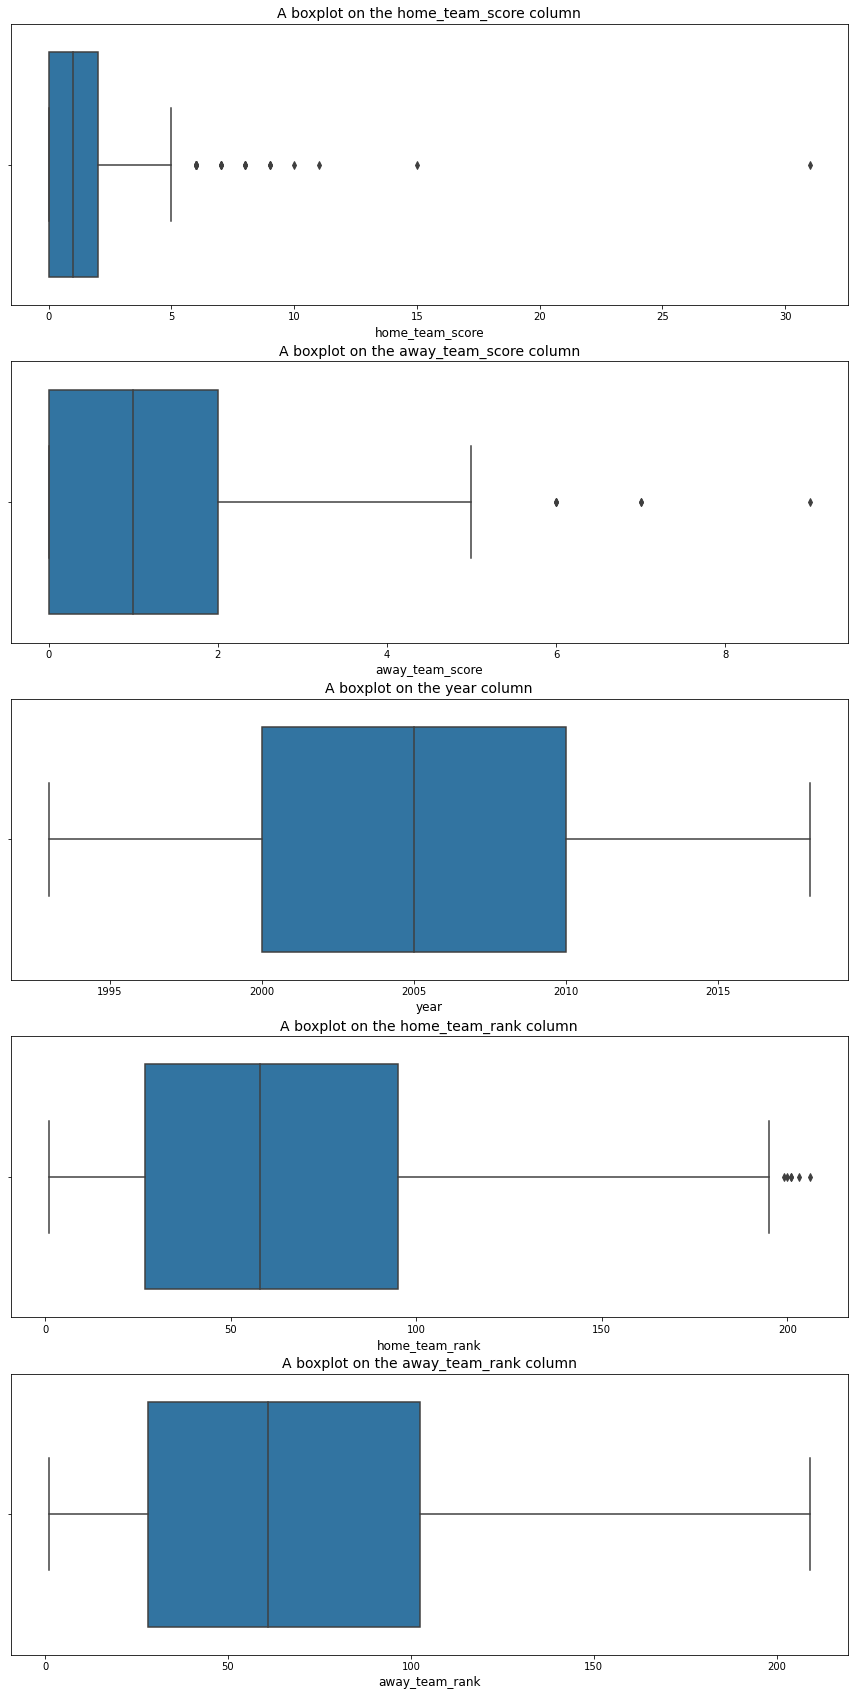

In [426]:
#Check for outliers and anomalies in our data

col_names = ['home_team_score','away_team_score','year','home_team_rank','away_team_rank']

fig, ax = plt.subplots(len(col_names), figsize = (15,30))

for i, col_val in enumerate(col_names):

  sns.boxplot(x = df_all[col_val], ax=ax[i])
  ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
  ax[i].set_xlabel(col_val, fontsize=12)

In [427]:
# Add a column to show teams that wom, lost or drew
df_all.loc[df_all['home_team_score'] > df_all['away_team_score'], 'game_results'] = 'Win'
df_all.loc[df_all['home_team_score'] < df_all['away_team_score'], 'game_results'] = 'Lose'
df_all.loc[df_all['home_team_score'] == df_all['away_team_score'], 'game_results'] = 'Draw'

#Add a column to show the total score of golas scored
df_all['total_scores'] = df['home_team_score'] + df_all['away_team_score']
df_all

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification,Win,4
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly,Draw,2
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification,Win,5
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly,Win,1
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification,Lose,4
...,...,...,...,...,...,...,...,...,...,...
952,England,2,Costa Rica,0,2018,12.0,23.0,Friendly,Win,2
953,Uruguay,3,Uzbekistan,0,2018,14.0,95.0,Friendly,Win,3
954,Portugal,3,Algeria,0,2018,4.0,66.0,Friendly,Win,3
955,Iceland,2,Ghana,2,2018,22.0,47.0,Friendly,Draw,4


In [428]:
df_all.nunique()

home_team          160
home_team_score     14
away_team          159
away_team_score      9
year                26
home_team_rank     181
away_team_rank     188
tournament          38
game_results         3
total_scores        14
dtype: int64

# Exploratory Data Analysis

### a. Univariate analysis

In [429]:
# Summary analysis
df_all.describe()

,home_team_score,away_team_score,year,home_team_rank,away_team_rank,total_scores
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,2004.789897,65.549943,69.918485,2.637199
std,1.905960,1.154691,5.405888,47.557993,50.497652,2.093601
min,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,2000.000000,27.000000,28.000000,1.000000
50%,1.000000,1.000000,2005.000000,58.000000,61.000000,2.000000
75%,2.000000,2.000000,2010.000000,95.000000,102.500000,4.000000
max,31.000000,9.000000,2018.000000,206.000000,209.000000,31.000000


Measure of Central Tendancy

In [430]:
df_all_uni = df_all[['home_team_score',	'away_team_score',	'year',	'home_team_rank',	'away_team_rank',	'total_scores']]
df_all_uni_mean=df_all_uni.mean()
print("Mean:\n",df_all_uni_mean)
print("******************************")
df_all_uni_median=df_all_uni.median()
print('median:\n',df_all_uni_median)

Mean:
 home_team_score       1.632606
away_team_score       1.004592
year               2004.789897
home_team_rank       65.549943
away_team_rank       69.918485
total_scores          2.637199
dtype: float64
******************************
median:
 home_team_score       1.0
away_team_score       1.0
year               2005.0
home_team_rank       58.0
away_team_rank       61.0
total_scores          2.0
dtype: float64


Measure of Dispersion

In [431]:
print('standard deviations:\n', df_all_uni.std())
print("******************************")
print('variance:\n', df_all_uni.var())

standard deviations:
 home_team_score     1.905960
away_team_score     1.154691
year                5.405888
home_team_rank     47.557993
away_team_rank     50.497652
total_scores        2.093601
dtype: float64
******************************
variance:
 home_team_score       3.632683
away_team_score       1.333312
year                 29.223622
home_team_rank     2261.762733
away_team_rank     2550.012888
total_scores          4.383166
dtype: float64


bar graph

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

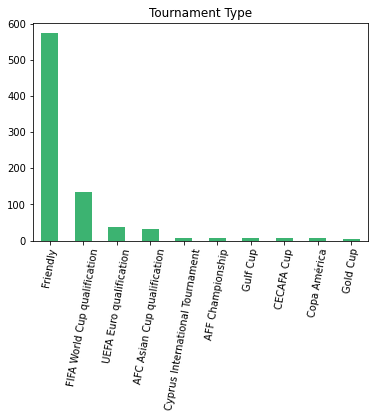

In [432]:
#bar plot showing tornament types
df_all.tournament.value_counts().head(10).plot.bar(color="mediumseagreen")
plt.title('Tournament Type')
plt.xticks(rotation=80)

In [433]:
df_all

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores
0,Bolivia,3,Uruguay,1,1993,59.0,22.0,FIFA World Cup qualification,Win,4
1,Brazil,1,Mexico,1,1993,8.0,14.0,Friendly,Draw,2
2,Ecuador,5,Venezuela,0,1993,35.0,94.0,FIFA World Cup qualification,Win,5
3,Guinea,1,Sierra Leone,0,1993,65.0,86.0,Friendly,Win,1
4,Paraguay,1,Argentina,3,1993,67.0,5.0,FIFA World Cup qualification,Lose,4
...,...,...,...,...,...,...,...,...,...,...
952,England,2,Costa Rica,0,2018,12.0,23.0,Friendly,Win,2
953,Uruguay,3,Uzbekistan,0,2018,14.0,95.0,Friendly,Win,3
954,Portugal,3,Algeria,0,2018,4.0,66.0,Friendly,Win,3
955,Iceland,2,Ghana,2,2018,22.0,47.0,Friendly,Draw,4


### b. Bivariate Analysis

Correlations

In [434]:
#Check for correlations
correlation = df_all.corr()
correlation

,home_team_score,away_team_score,year,home_team_rank,away_team_rank,total_scores
home_team_score,1.000000,-0.132413,-0.008058,-0.043381,0.309322,0.837344
away_team_score,-0.132413,1.000000,-0.044407,0.143060,-0.151524,0.430988
year,-0.008058,-0.044407,1.000000,0.212261,0.268029,-0.031828
home_team_rank,-0.043381,0.143060,0.212261,1.000000,0.534618,0.039409
away_team_rank,0.309322,-0.151524,0.268029,0.534618,1.000000,0.198028
total_scores,0.837344,0.430988,-0.031828,0.039409,0.198028,1.000000


Heatmap

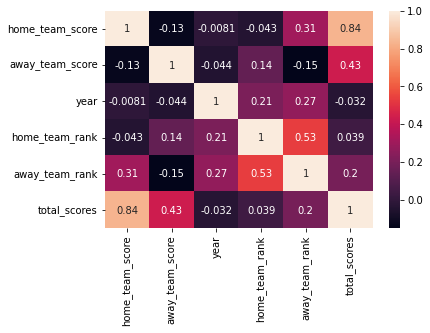

In [435]:
#Plotting heat map
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

Multicollinearity

In [436]:
#Use VIF score of the data
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,home_team_score,away_team_score,year,home_team_rank,away_team_rank,total_scores
home_team_score,5.448898e+13,3.301117e+13,0.014673,0.287678,-0.408866,-5.985342e+13
away_team_score,3.301117e+13,1.999922e+13,-0.014482,-0.367445,0.427693,-3.626111e+13
year,1.492548e-02,-1.432904e-02,1.093202,-0.088774,-0.269227,8.528529e-02
home_team_rank,2.902191e-01,-3.659059e-01,-0.088774,1.612573,-0.992410,4.483711e-02
away_team_rank,-4.119032e-01,4.258525e-01,-0.269227,-0.992410,1.828354,-1.701571e-01
total_scores,-5.985342e+13,-3.626111e+13,0.085562,0.047628,-0.173493,6.574598e+13


The Vif score along the downward slope had values less that 5, which concludes that there is a low correlation between our independent variables

##  Polynomial Regression

In [437]:
#create a copy of the dataframe

df = df_all.copy()

In [438]:
#Encode our categorical columns
label_encoder = LabelEncoder()

# home team
label_encoder.fit(df['home_team'])
df['home_team'] = label_encoder.transform(df['home_team'])

# away team
label_encoder.fit(df['away_team'])
df['away_team'] = label_encoder.transform(df['away_team'])

#tournament
label_encoder.fit(df['tournament'])
df['tournament'] = label_encoder.transform(df['tournament'])

# game results
label_encoder.fit(df['game_results'])
df['game_results'] = label_encoder.transform(df['game_results'])

# year
label_encoder.fit(df['year'])
df['year'] = label_encoder.transform(df['year'])

df

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores
0,20,3,150,1,0,59.0,22.0,16,2,4
1,23,1,90,1,0,8.0,14.0,17,0,2
2,40,5,153,0,0,35.0,94.0,16,2,5
3,59,1,125,0,0,65.0,86.0,17,2,1
4,111,1,7,3,0,67.0,5.0,16,1,4
...,...,...,...,...,...,...,...,...,...,...
952,43,2,35,0,25,12.0,23.0,17,2,2
953,151,3,151,0,25,14.0,95.0,17,2,3
954,115,3,2,0,25,4.0,66.0,17,2,3
955,65,2,56,2,25,22.0,47.0,17,0,4


### Models

model 1: Predict how many goals the team scores

In [439]:
#declaring the independent variable as X and y

X = df[['home_team_rank','away_team_rank','tournament']].values
y = df['home_team_score'].values

In [440]:
# Split the dataset into train and test sets

# set traning size of 80%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


In [441]:
# Standardizing our data

feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [442]:
# Perform Polynomial Regression
#
poly_reg = PolynomialFeatures(degree = 4) 
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)


pol_reg = LinearRegression()
pol_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [443]:
#Predicting
y_predict = pol_reg.predict(X_test)
y_predict

array([ 0.91318187,  0.51402591,  1.31737329,  1.09137093,  0.89399866,
        1.21655595,  1.18889168,  1.57390194,  0.99712391,  1.27821097,
        2.04946553,  1.77246863,  1.38590536,  1.72413712,  1.67063112,
        1.05077167,  1.30416939,  1.21132578,  1.78735676,  1.13811036,
        1.88095162,  1.13404649,  1.5817686 ,  1.34317503,  1.22497074,
        0.5805761 ,  0.02480608,  1.57112494,  1.59309107,  1.37560131,
        1.26128964,  0.64763843,  1.69288684,  0.89700347,  0.85247322,
        1.68506098,  0.87355237,  1.4642575 ,  1.94794894,  0.84602681,
        1.59467464,  1.66604215,  1.02687393,  2.08442012,  1.98800589,
        2.80116373,  1.28209869,  0.21887962,  2.84633362,  1.33078736,
        1.72978343,  1.06220853,  1.63470528,  2.09120348,  1.31591577,
        0.99165445,  0.9356142 ,  1.56568413,  1.18834609,  1.30516781,
        1.88928742,  1.58221322,  1.36397953,  1.43072724,  1.36196235,
        1.29334866,  1.92369671,  1.77711129,  1.6470317 ,  3.05

In [444]:
# Compute RMSE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("The RMSE score is: ",rmse)

The RMSE score is:  1.5315071620776417


Bartlett test

In [445]:
# Use Bartlett test to check the homogeneity of our dataset

residuals = np.subtract(y_predict, y_test)

pd.DataFrame(residuals).describe()

residuals.mean()

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

degree_of_freedom = len(y_predict) - 1

probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
    print('There are patterns to the variance of the data')
if (test_result < critical_value):
  print('The variance is homogenous across our data')

The variance is homogenous across our data


## Cross Validation

In [446]:
# We shall crosvalidate to check the skill of our model.
#
folds = KFold(n_splits=10)
print('Number of folds: ',str(folds.get_n_splits(X)))

# We now create and assess models based on the folds we created.

RMSES = [] # We will use this array to keep track of the RMSE of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_predict = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_predict))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

print("\nThe mean of our RMSEs is ", np.mean(RMSES))

Number of folds:  10

Training model 1
Model 1 Root Mean Squared Error: 1.4297526810930787

Training model 2
Model 2 Root Mean Squared Error: 1.5184071886401382

Training model 3
Model 3 Root Mean Squared Error: 3.267106363063609

Training model 4
Model 4 Root Mean Squared Error: 1.2119095487731706

Training model 5
Model 5 Root Mean Squared Error: 1.8771033743701577

Training model 6
Model 6 Root Mean Squared Error: 1.4172777607682696

Training model 7
Model 7 Root Mean Squared Error: 1.260296363686627

Training model 8
Model 8 Root Mean Squared Error: 1.2672407024858294

Training model 9
Model 9 Root Mean Squared Error: 1.337334513287353

Training model 10
Model 10 Root Mean Squared Error: 2.03599762453511

The mean of our RMSEs is  1.6622426120703342


The RMSE of model 3 and 10 are far away from the rest because of the outliers that we did not remove

## Residual Plots & Heteroscedasticity

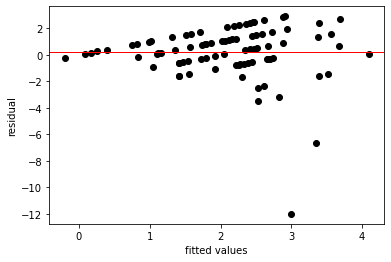

In [447]:
# Plotting our residual plots
#
residuals = np.subtract(y_predict, y_test)
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()


Model 2: Predict how many goals the away team scores.


Our residuals have a pattern, thus there may be an issue with the correctness of our model for prediction. We may therefore need to redefine our variables.

In [448]:
# Assigning X & Y to our independent and dependent variables
#
X = df[['home_team_rank','away_team_rank','tournament']].values
y = df['away_team_score'].values

In [449]:
# Split the dataset into train and test sets
#
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state = 0)

In [450]:
# Standardizing our data
#
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [451]:
# Fit our dataset to polynomial Regression
#
poly_reg = PolynomialFeatures(degree = 4) 
X_train = poly_reg.fit_transform(X_train)
X_test = poly_reg.fit_transform(X_test)


pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [452]:
# Predicting 
#
y_predict = pol_reg.predict(X_test)

In [455]:
# Compute RMSE
#
from sklearn.metrics import mean_squared_error
rmse2 = np.sqrt(mean_squared_error(y_test, y_predict))
rmse2

1.3445336116291566

Our RMSE is 1.34453, we shall now check for homogeneity

In [456]:
# Using Bartlett test to check the homogeneity of our dataset
#
residuals = np.subtract(y_predict, y_test)

pd.DataFrame(residuals).describe()

residuals.mean()

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

degree_of_freedom = len(y_predict) - 1

probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
    print('There are patterns to the variance of the data')
if (test_result < critical_value):
  print('The variance is homogenous across our data')

The variance is homogenous across our data


### Cross Validation

In [457]:
# We shall crosvalidate to check the skill of our model.
#
folds = KFold(n_splits=10)
print('Number of Folds ',str(folds.get_n_splits(X)))

# We now create and assess models based on the folds we created.

RMSES = [] # We will use this array to keep track of the RMSE of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_predict = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_predict))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

print("\nThe mean of our RMSEs is ", np.mean(RMSES))

Number of Folds  10

Training model 1
Model 1 Root Mean Squared Error: 1.1050533087274415

Training model 2
Model 2 Root Mean Squared Error: 0.9927110387616627

Training model 3
Model 3 Root Mean Squared Error: 1.2860044935154484

Training model 4
Model 4 Root Mean Squared Error: 1.1863548493974092

Training model 5
Model 5 Root Mean Squared Error: 1.1893419536021443

Training model 6
Model 6 Root Mean Squared Error: 1.189700818774265

Training model 7
Model 7 Root Mean Squared Error: 1.0981493808080283

Training model 8
Model 8 Root Mean Squared Error: 0.8724205553142826

Training model 9
Model 9 Root Mean Squared Error: 1.0872499356231318

Training model 10
Model 10 Root Mean Squared Error: 0.9801519247968117

The mean of our RMSEs is  1.0987138259320623


## Residual Plots & Heteroscedasticity

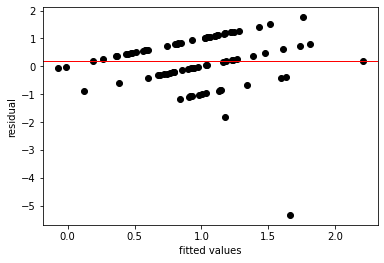

In [458]:
# Plotting our residual plots
#
residuals = np.subtract(y_predict, y_test)
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Our residuals have a pattern, thus there may be an issue with the correctness of our model for prediction. We may therefore need to redefine our variables.

## Logistic Regression

In [459]:
df

,home_team,home_team_score,away_team,away_team_score,year,home_team_rank,away_team_rank,tournament,game_results,total_scores
0,20,3,150,1,0,59.0,22.0,16,2,4
1,23,1,90,1,0,8.0,14.0,17,0,2
2,40,5,153,0,0,35.0,94.0,16,2,5
3,59,1,125,0,0,65.0,86.0,17,2,1
4,111,1,7,3,0,67.0,5.0,16,1,4
...,...,...,...,...,...,...,...,...,...,...
952,43,2,35,0,25,12.0,23.0,17,2,2
953,151,3,151,0,25,14.0,95.0,17,2,3
954,115,3,2,0,25,4.0,66.0,17,2,3
955,65,2,56,2,25,22.0,47.0,17,0,4


In [460]:
# Assigning X & Y to our independent and dependent variables
#
X = df.drop(['game_results'],axis=1).values
y = df['game_results'].values

In [461]:
# Splitting our data into train and test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=25)

In [462]:
# Fit our dataset to logistic regression
#
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Predicting
#
y_predict = LogReg.predict(X_test)
y_predict

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1,
       2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1,
       2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1,
       0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2,
       0, 2, 1, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1])

In [463]:
#Creating a confusion matrix to get the accuracy of our model.
#
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,y_predict)
confusion_matrix

array([[ 59,  11,   0],
       [  4,  59,   0],
       [  0,   0, 129]])

In [464]:
LogReg.score(X_test, y_test)

0.9427480916030534

The logistic regression has an accuracy of 94%.

Cross Validation

In [465]:
#Cross Validating our data
#
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, random_state=0)
from sklearn.model_selection import cross_val_score

all_accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train,cv=5)
print(all_accuracies.mean())

0.991749085489771


After Evaluation the model is found to have an accuracy of 99%